### Interpreting Pima Diabetes Prediction with Eli5,Shap,LIME
+ SHAP(SHapley Additive exPlanations) :break down a prediction to show the impact of each feature.

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [3]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Labels For Columns/Header
+ Pregnancies::Number of times pregnant
+ Glucose::Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ BloodPressure::Diastolic blood pressure (mm Hg)
+ SkinThickness::Triceps skin fold thickness (mm)
+ Insulin::2-Hour serum insulin (mu U/ml)
+ BMI::Body mass index (weight in kg/(height in m)^2)
+ DiabetesPedigree::FunctionDiabetes pedigree function
+ Age::Age (years)
+ Outcome::Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0 No DM, 1 has DM)

In [4]:
names = ["Num_of_Preg","Glucose_Conc","BP","Skin_Thickness","TwoHour_Insulin","BMI","DM_Pedigree","Age","Class"]

In [5]:
# Load Dataset
df = pd.read_csv("pima-indians-diabetes.csv",names=names)

In [6]:
df.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
# Check For Missing Values
df.isna().sum()

Num_of_Preg        0
Glucose_Conc       0
BP                 0
Skin_Thickness     0
TwoHour_Insulin    0
BMI                0
DM_Pedigree        0
Age                0
Class              0
dtype: int64

In [9]:
# Data Types
df.dtypes

Num_of_Preg          int64
Glucose_Conc         int64
BP                   int64
Skin_Thickness       int64
TwoHour_Insulin      int64
BMI                float64
DM_Pedigree        float64
Age                  int64
Class                int64
dtype: object

In [10]:
# Check For Occurence of Class
df.groupby('Class').size()

Class
0    500
1    268
dtype: int64

<Axes: xlabel='Class'>

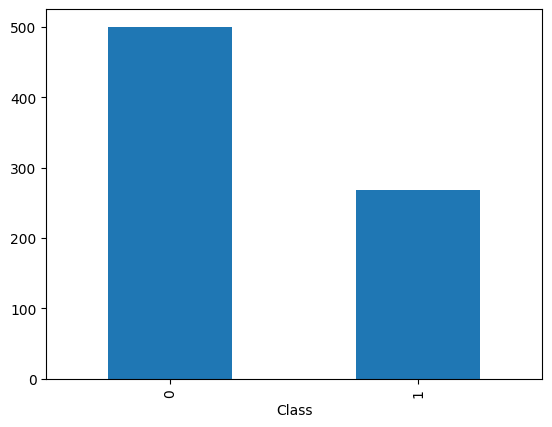

In [11]:
df.groupby('Class').size().plot(kind="bar")

In [12]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

<Axes: >

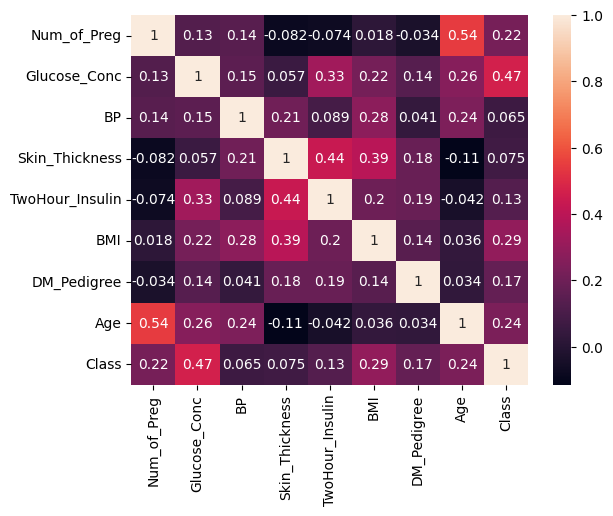

In [13]:
sns.heatmap(corr,annot=True)

### Narrative
+ Fig 1 : There are more patients without DM than with Dm
+ Fig 2: Correlation of various xtics    

In [14]:
#### Data Viz of Entire Dataset

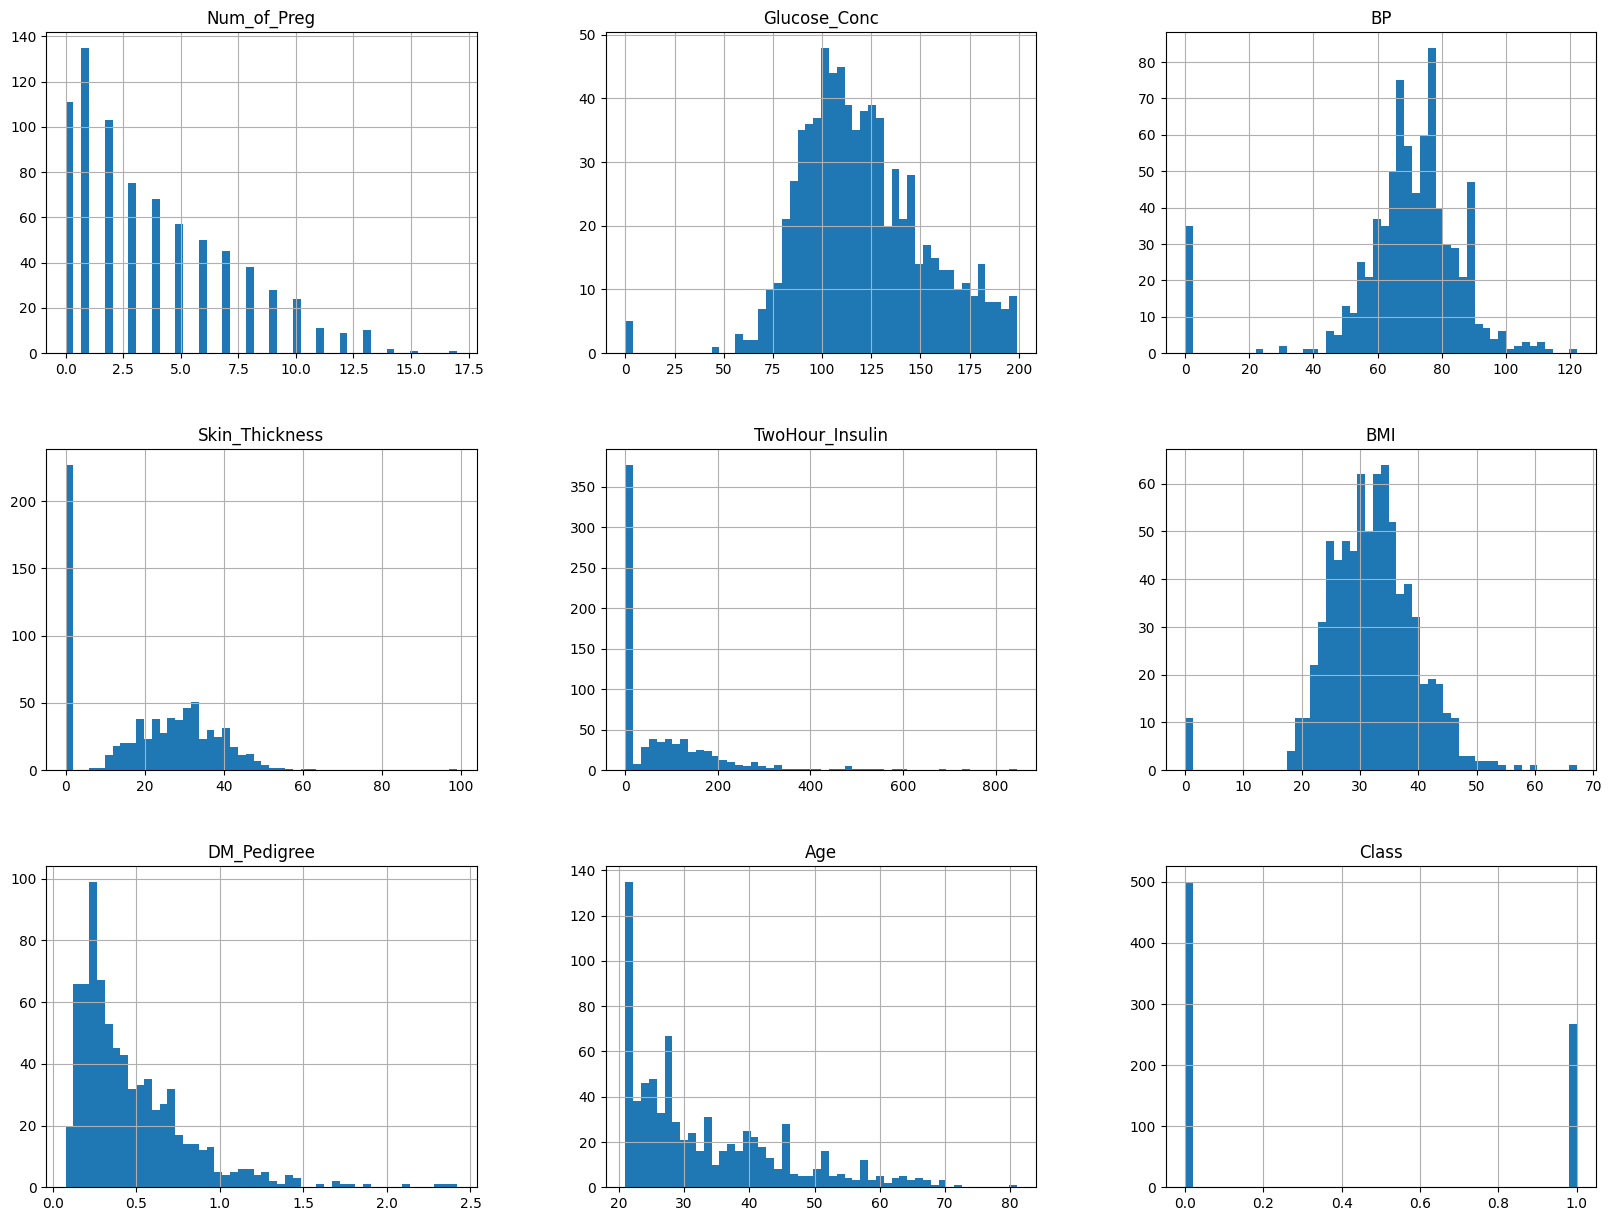

In [15]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [16]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_of_Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose_Conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
TwoHour_Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DM_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Data Cleaning 
+ Removing 0 sinces BP and BMI Cant be zero

In [17]:
# Checking For Minimum BP
df['BP'].min()

np.int64(0)

In [18]:
# Checking For Minimum BMI
df['BMI'].min()

np.float64(0.0)

In [19]:
# Replace 0 with Median not Mean
df['BP'] = df['BP'].replace(to_replace=0,value=df['BP'].median())

In [20]:
# Recheck
df['BP'].min()

np.int64(24)

In [21]:
# Replace 0 with Median not Mean
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())

In [22]:
df['TwoHour_Insulin'].min()

np.int64(0)

In [23]:
df['TwoHour_Insulin'] = df['TwoHour_Insulin'].fillna(df['TwoHour_Insulin'].median())

In [24]:
df['Glucose_Conc'].min()

np.int64(0)

In [25]:
# Replace 0 with Median not Mean
df['Glucose_Conc'] = df['Glucose_Conc'].replace(to_replace=0,value=df['Glucose_Conc'].median())

In [26]:
df['Skin_Thickness'] = df['Skin_Thickness'].fillna(df['Skin_Thickness'].median())

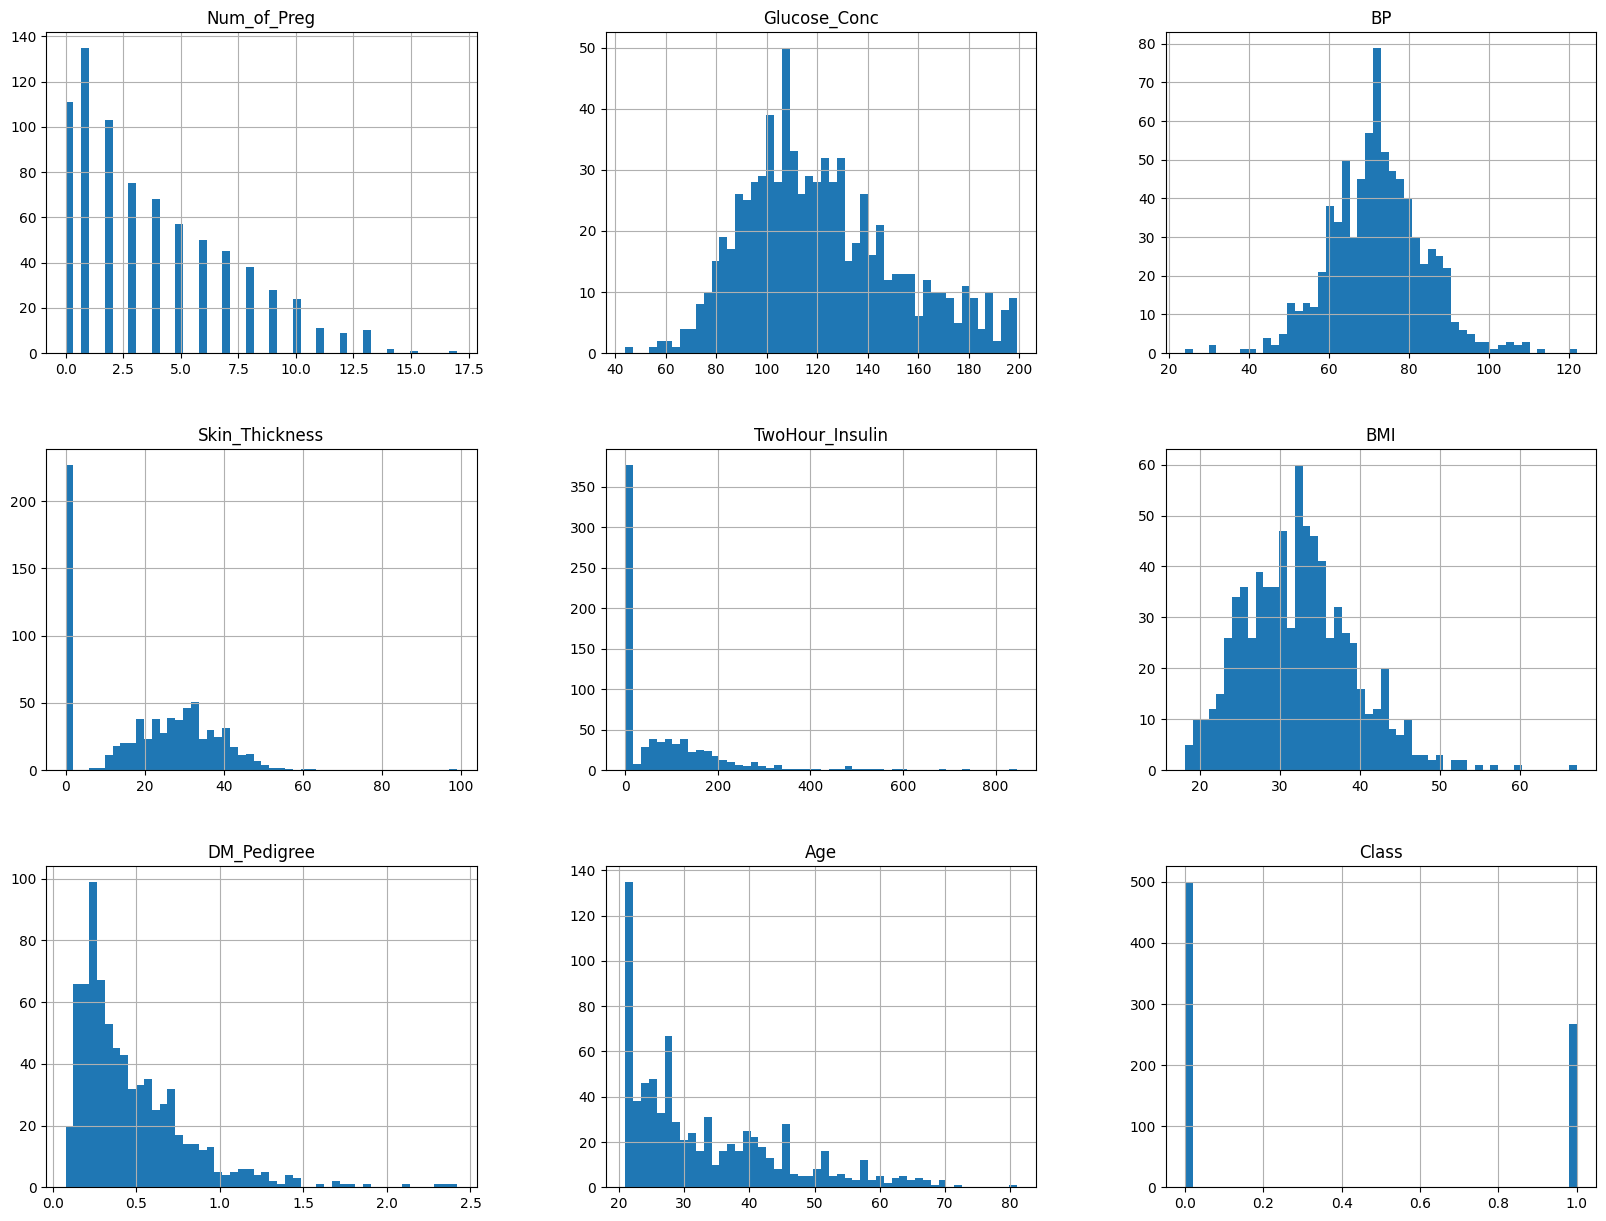

In [27]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Num_of_Preg      768 non-null    int64  
 1   Glucose_Conc     768 non-null    int64  
 2   BP               768 non-null    int64  
 3   Skin_Thickness   768 non-null    int64  
 4   TwoHour_Insulin  768 non-null    int64  
 5   BMI              768 non-null    float64
 6   DM_Pedigree      768 non-null    float64
 7   Age              768 non-null    int64  
 8   Class            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Feature Prep

In [29]:
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [30]:
df.shape

(768, 9)

In [31]:
df.iloc[:,0:8]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [32]:
Xfeatures = df.iloc[:,0:8]

In [33]:
Ylabels = df['Class']

### Scale Our Dataset

In [34]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [35]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [36]:
X.shape

(768, 8)

In [37]:
names[0:8]

['Num_of_Preg',
 'Glucose_Conc',
 'BP',
 'Skin_Thickness',
 'TwoHour_Insulin',
 'BMI',
 'DM_Pedigree',
 'Age']

In [38]:
X = pd.DataFrame(X,columns=names[0:8])

In [39]:
X.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000


#### Split Dataset

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

In [41]:
X_train.shape

(614, 8)

### Building the Models
+ Logistic Regression
+ KNN

In [42]:
# Logit
logit = LogisticRegression()
logit.fit(X_train,y_train)

/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_fea

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))

Accuracy Score of Logisitic:: 0.7792207792207793


/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [44]:
X_test.values[0]

array([0.35294118, 0.3483871 , 0.34693878, 0.33333333, 0.22458629,
       0.32310838, 0.15029889, 0.36666667])

In [45]:
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[0]).reshape(1,-1))

/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

#### SHAP explainers
+ TreeExplainer :: XGBoost/LightGBM/CatBoost/scikit-learn models
        - shap.TreeExplainer(model)
+ DeepExplainer:: For Deep learning models eg (TensorFlow/Keras models)
        - shap.DeepExplainer(model, background/sample)
+ GradientExplainer:: Deep learning models eg (TensorFlow/Keras/PyTorch models)
        - shap.GradientExplainer((model.layers[7].input, model.layers[-1].output),map2layer(X, 7),local_smoothing=0 # std dev of smoothing noise)
+ KernelExplainer :: Model agnostic (explains any function),slow,gives an approximation
        - shap.KernelExplainer(svm.predict_proba, X_train, link="logit")

In [46]:
# Load ML Interpreting Models
import shap

In [69]:
# Initialize JS For Plot
shap.initjs()

In [53]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


[0]
Prediction for first test sample: [0]


/Users/shankuriakose/GitHub/xAI/xAI/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


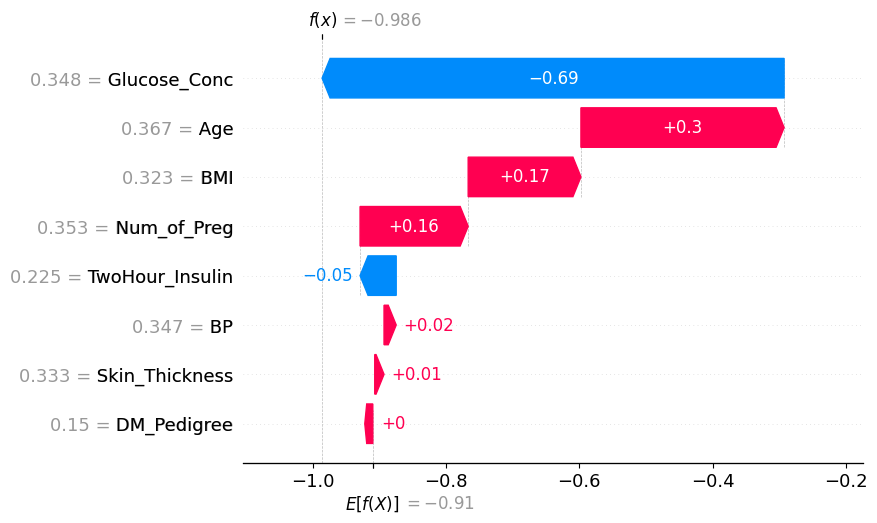

In [ ]:
import shap

explainer = shap.Explainer(logit, X_train)

shap_values = explainer(X_test)

sample_pred = logit.predict(np.array(X_test.values[0]).reshape(1, -1))

print(sample_pred)

print("Prediction for first test sample:", sample_pred)
shap.plots.waterfall(shap_values[0])



#### Narrative
+ Red :: Features that push the prediction to the base line
+ Blue :: Features that pull the prediction lower from the base line      
+ NB:: You can check for individual features and compare each feature with the other

In [66]:
ind = 0
shap.plots.force(shap_values[ind])

### Summary of All Effect of All Features
+ Using shap.summary_plot()

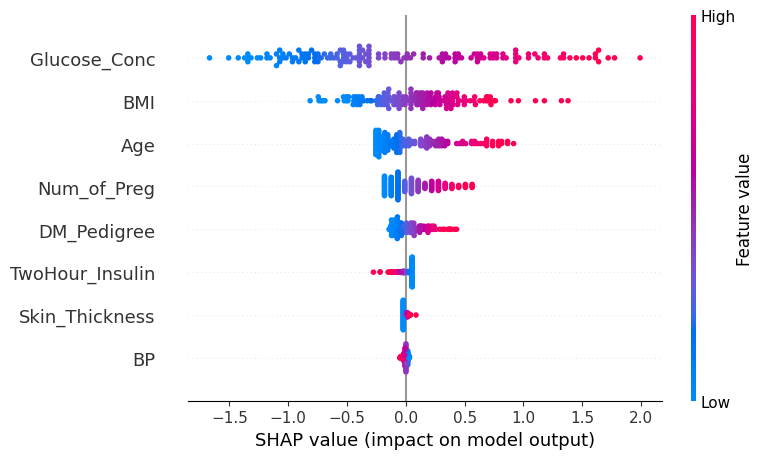

In [63]:
shap.summary_plot(shap_values,X_test)

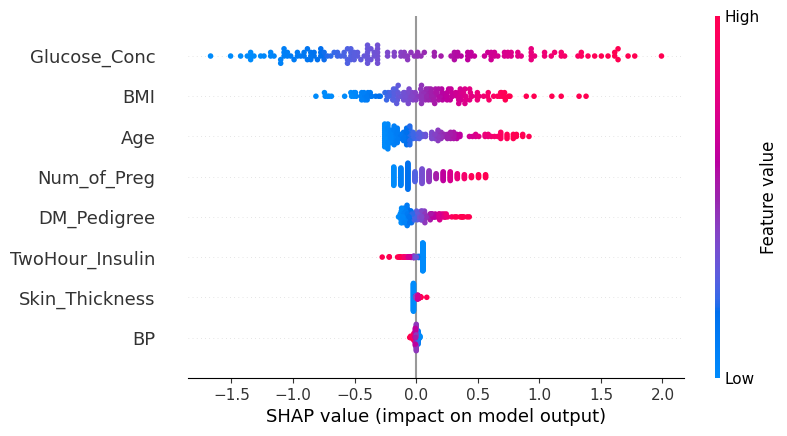

In [64]:
shap.plots.beeswarm(shap_values)

### Dependency Plot
+ Shows the effect a single feature has on the prediction
+ How much the prediction depends on a particular feature
+ shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)

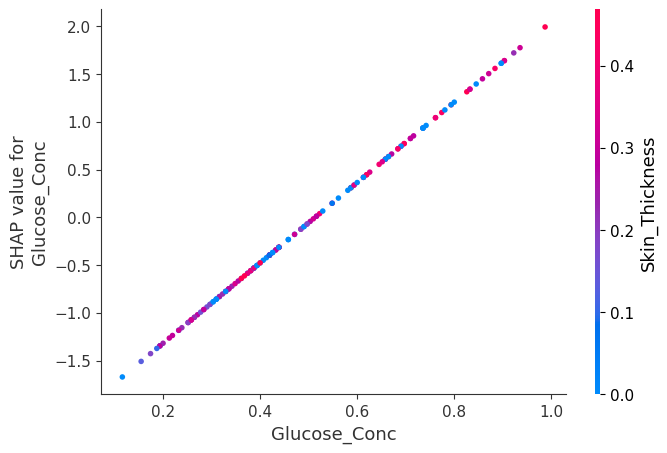

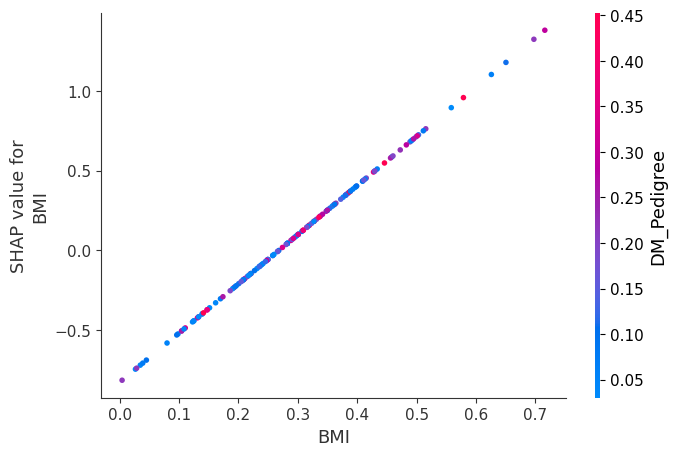

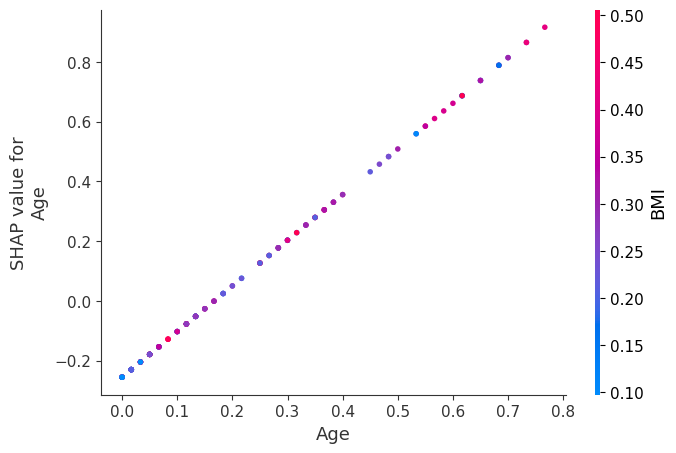

In [67]:
# Dependency plots for key features

# For Glucose Concentration
shap.dependence_plot("Glucose_Conc", shap_values.values, X_test, feature_names=names[0:8])

# For BMI
shap.dependence_plot("BMI", shap_values.values, X_test, feature_names=names[0:8])

# For Age
shap.dependence_plot("Age", shap_values.values, X_test, feature_names=names[0:8])
